In [83]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [84]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import pandas as pd
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [85]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 568


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [86]:
geoapify_key = "24c9ad2bdeb9ddcb5ea213ea1dba4dea"

In [87]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shubarshi
Processing Record 2 of Set 1 | mermoz boabab


Processing Record 3 of Set 1 | laayoune plage
City not found. Skipping...
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | susuman
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | quellon
Processing Record 8 of Set 1 | sydney mines
Processing Record 9 of Set 1 | palmer
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | colonia
Processing Record 12 of Set 1 | talnakh
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | vorgashor
Processing Record 17 of Set 1 | bakchar
Processing Record 18 of Set 1 | papatowai
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | arteche
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | salinas
Processing Record 23 of Set 1 | petropavlovsk-kamchatsky
Processing Record 24 of Set 1 | lethbridge
Processing Rec

In [ ]:
weather_api_key

'f76e581eab4fefc55854ce9676f62a42'

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [ ]:
# Display sample data
city_data_df.head(4)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,-27.71,100,84,1.50,RU,1709713677
1,port-aux-francais,-49.3500,70.2167,6.32,82,44,13.12,TF,1709713677
2,yoko,5.5333,12.3167,26.61,59,97,2.22,CM,1709713677
3,katabu,-4.9333,122.5167,29.41,78,64,0.14,ID,1709713677


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-27.71,100,84,1.50,RU,1709713677
1,port-aux-francais,-49.3500,70.2167,6.32,82,44,13.12,TF,1709713677
2,yoko,5.5333,12.3167,26.61,59,97,2.22,CM,1709713677
3,katabu,-4.9333,122.5167,29.41,78,64,0.14,ID,1709713677
4,invercargill,-46.4000,168.3500,13.90,89,25,3.13,NZ,1709713677


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

Text(0.5, 1.0, 'latitude vs Temprature')

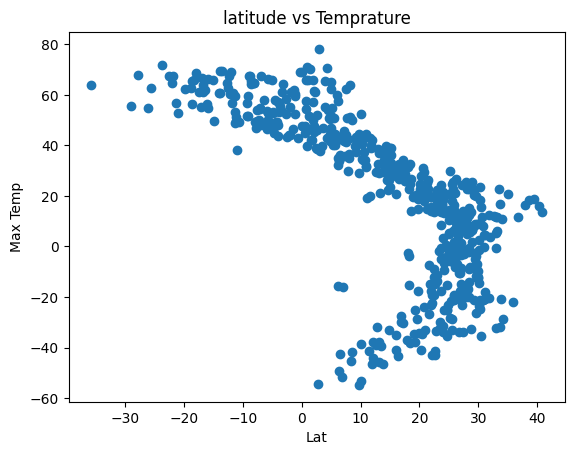

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.title("latitude vs Temprature")

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
#plt.show()

#### Latitude Vs. Humidity

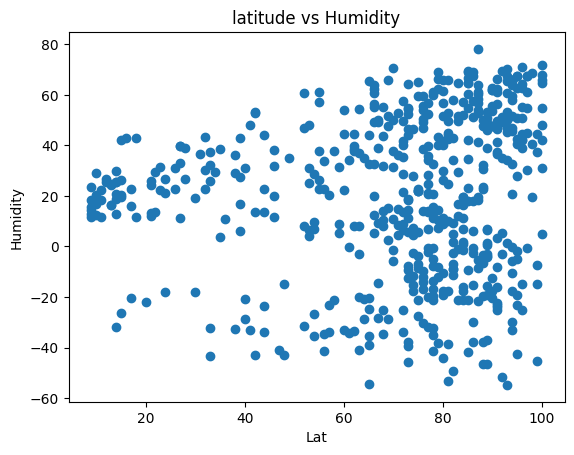

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("latitude vs Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

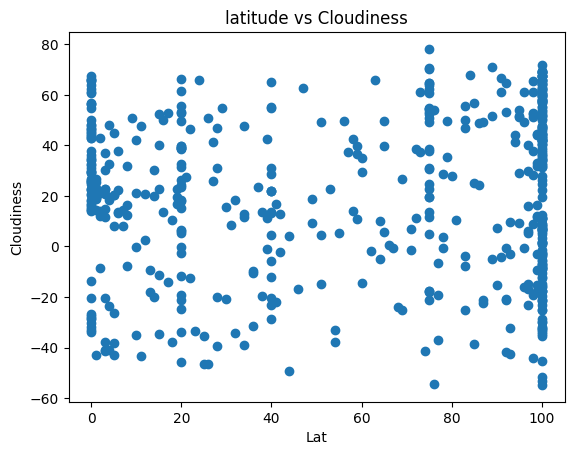

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title("latitude vs Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

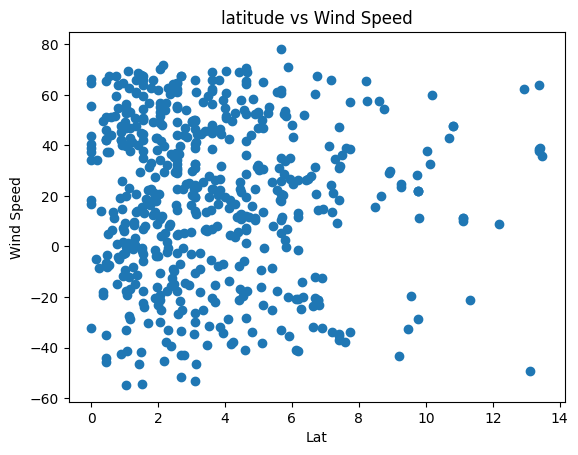

In [ ]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.title("latitude vs Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
def linear_plot(x,y,x_,y_):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)

    # Plotting the data points
    plt.scatter(x, y, label='Data Points')
    predictions = slope * x + intercept

    # Plotting the regression line
    plt.plot(x, predictions, color='red', label='Linear Regression')
    equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
    plt.annotate(equation,xy =(x_ ,y_),color = "red",fontsize =15)

    # Adding labels and title
    plt.xlabel('Latitude')
    plt.ylabel(y.name)
    #plt.title('Linear Regression: Max Temperature vs. Latitude')
    print(f"The r-value is: {rvalue**2}")
    # Displaying the legend
    #plt.legend()

    # Show the plot
    plt.show()


In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-27.71,100,84,1.50,RU,1709713677
2,yoko,5.5333,12.3167,26.61,59,97,2.22,CM,1709713677
5,crane,31.3974,-102.3501,17.08,23,100,1.72,US,1709713677
6,yuzhno-kurilsk,44.0306,145.8556,-2.01,65,94,2.77,RU,1709713677
7,robertsport,6.7533,-11.3686,26.27,89,100,3.43,LR,1709713678


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,6.32,82,44,13.12,TF,1709713677
3,katabu,-4.9333,122.5167,29.41,78,64,0.14,ID,1709713677
4,invercargill,-46.4000,168.3500,13.90,89,25,3.13,NZ,1709713677
10,edinburgh of the seven seas,-37.0676,-12.3116,17.93,89,77,7.42,SH,1709713678
21,cabedelo,-6.9811,-34.8339,26.37,82,100,3.93,BR,1709713562


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8004353627860935


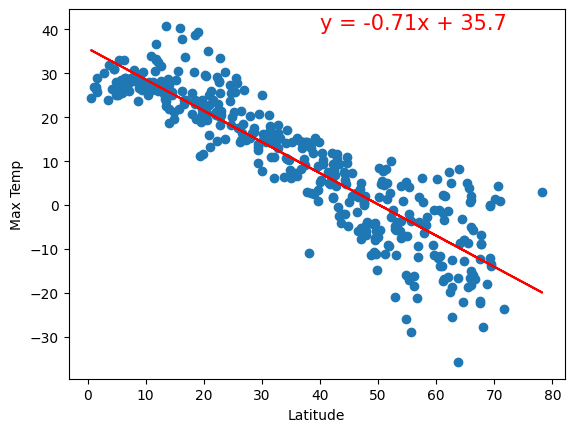

In [88]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
linear_plot(x,y,40,40)



The r-value is: 0.3653980065941527


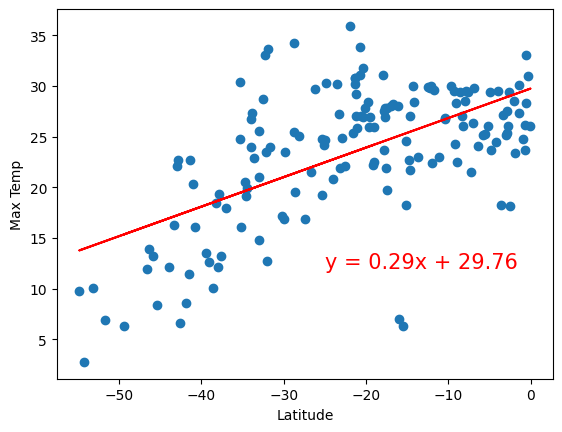

In [90]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
linear_plot(x,y,-25,12)


**Discussion about the linear relationship:** Northern_hem Max Temp vs Latitude have a strong correlation while the southern_hem has a  weak correlation

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1510969283697212


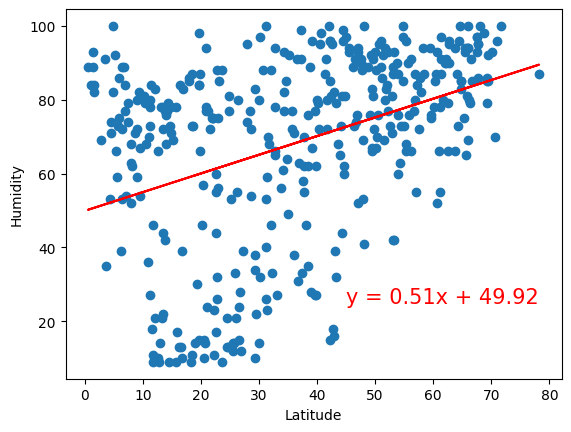

In [93]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
linear_plot(x,y,45,25)


The r-value is: 0.05960019500094752


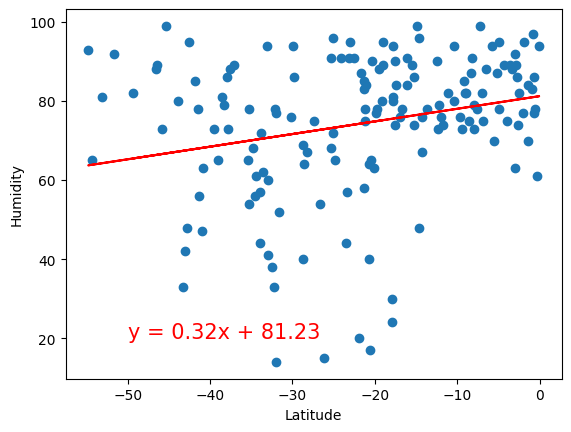

In [95]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
linear_plot(x,y,-50,20)


**Discussion about the linear relationship:** both northern and souther hem have a weak corelation for humidity vs latitide

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.8004353627860935


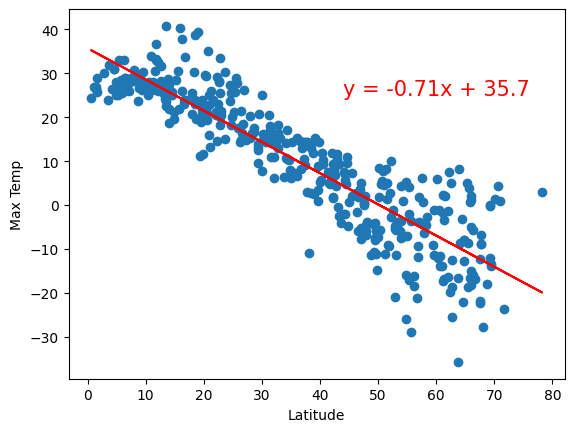

In [97]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
linear_plot(x,y,44,25)



The r-value is: 0.3653980065941527


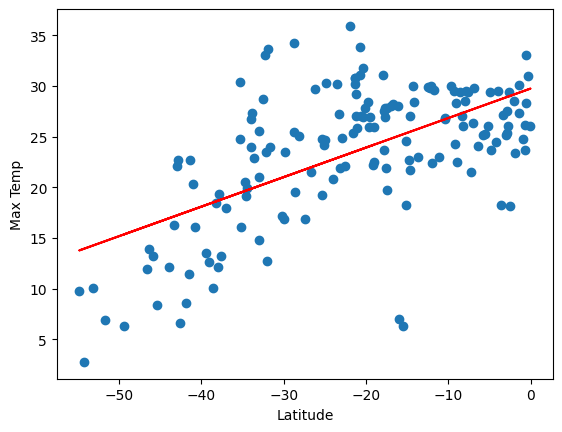

In [102]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
linear_plot(x,y,-45,-20)


**Discussion about the linear relationship:** Northern hem has a strong correlation 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.8004353627860935


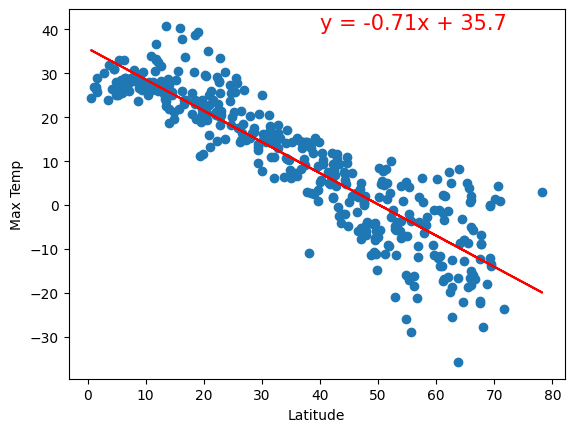

In [107]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
linear_plot(x,y,40,40)


The r-value is: 0.3653980065941527


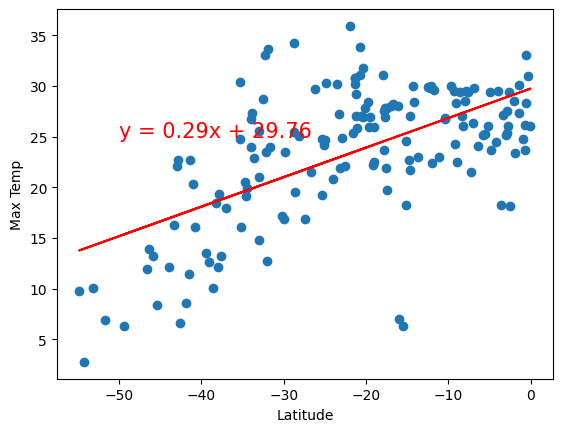

In [109]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
linear_plot(x,y,-50,25)


**Discussion about the linear relationship Northern has strong correlation while the souther has a very weak correlation